In [1]:
import numpy as np
import matplotlib.pyplot as plt
from solver.interior_point import InteriorPointMethod

In [2]:
def graph_2d(equations, x, x_iter, x_parallel=None, y_parallel=None, figsize=(10, 10), xlim=5, ylim=5):
    x1 = []
    y1 = []

    for x_ in x_iter:
        x1.append(x_[0])
        y1.append(x_[1])

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    if x_parallel is not None:
        for y_line in x_parallel:
            plt.axhline(y=y_line)
            plt.fill_between(0, y_line, x, alpha=0.5)

    if y_parallel is not None:
        for x_line in y_parallel:
            plt.axvline(x=x_line)
            plt.fill_between(x_line, 0, x, alpha=0.5)
            
    
    for (x, y) in equations:
        plt.plot(x, y, lw=1)
        plt.fill_between(x, 0, y, alpha=0.5)

    for (x_, y_) in zip(x1, y1):
        plt.plot(x_, y_, 'x', color='k')
    plt.plot(x1, y1, lw=1, label='Interior Point', color='k')

    # add non-negativity constraints
    plt.plot(np.zeros_like(x), x, lw=1, label='y non-negative')
    plt.plot(x, np.zeros_like(x), lw=1, label='x non-negative')

    # labels and stuff
    # ax.set_aspect('equal')
    ax.grid(True, which='both')

    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.xlim(0, xlim)
    plt.ylim(0, ylim)

    handles, labels = ax.get_legend_handles_labels()

    plt.legend(handles=handles, fontsize=14)
    plt.show()

## Example 1

$
\begin{align}
    \max \quad & x_{1} + 2x_{2} \\
    \textrm{s.t.} \quad & x_{1} + s_{1} &= 2.3 \\
    \quad & 2x_{1} + 2x_{2} + s_{2} &= 10 \\
    \quad & 4x_{1} + x_{2} + s_{3} &= 10 \\
    \quad & 4x_{1} + 2x_{2} + s_{4} &= 12 \\
    \quad & x_{1} + 2.2x_{2} + s_{5} &= 10 \\
    \quad & x_{1}, x_{2} & \geq 0
\end{align}
$

In [3]:
A = np.asarray(np.asmatrix('1, 0, 1, 0, 0, 0, 0; \
                         2, 2, 0, 1, 0, 0, 0; \
                         4, 1, 0, 0, 1, 0, 0; \
                         4, 2, 0, 0, 0, 1, 0; \
                         1, 2.2, 0, 0, 0, 0, 1'), dtype=np.float64)
b = np.asarray([2.3, 10, 10, 12, 10], dtype=np.float64)
c = np.asarray([-1, -2, 0, 0, 0, 0, 0], dtype=np.float64)

epsilon = 1e-3

ipm = InteriorPointMethod(A, b, c)
x_ipm, x_ipm_iter = ipm.solve(theta=0.95, gamma=0.01, epsilon=epsilon)
print(ipm.print_metric())

Iteration -> 0
-----------------------------------------------------
Delta Y -> [ 0.03959005 -0.04907285  0.46448371 -0.75369276  0.65960181]
-----------------------------------------------------
Delta S -> [-1.34420995 -3.21007647 -0.93959005 -0.85092715 -1.36448371 -0.14630724
 -1.55960181]
-----------------------------------------------------
Delta X -> [ 0.45230995  2.31817647  0.04769005 -0.04097285  0.47258371 -0.74559276
  0.66770181]
-----------------------------------------------------
Ax - b = [-0.025 -0.275 -0.23  -0.285 -0.311] 
-----------------------------------------------------
Norm of Ax - b -> 0.554162431061507 
-----------------------------------------------------
Coordinates -> [1.32969446 3.10226765 0.94530554 0.86107579 1.34895452 0.19168688
 1.53431672]
-----------------------------------------------------
Functional value -> -7.534229751131222
Iteration -> 1
-----------------------------------------------------
Delta Y -> [ 0.2015516  -0.49371369  0.13461201 -0.

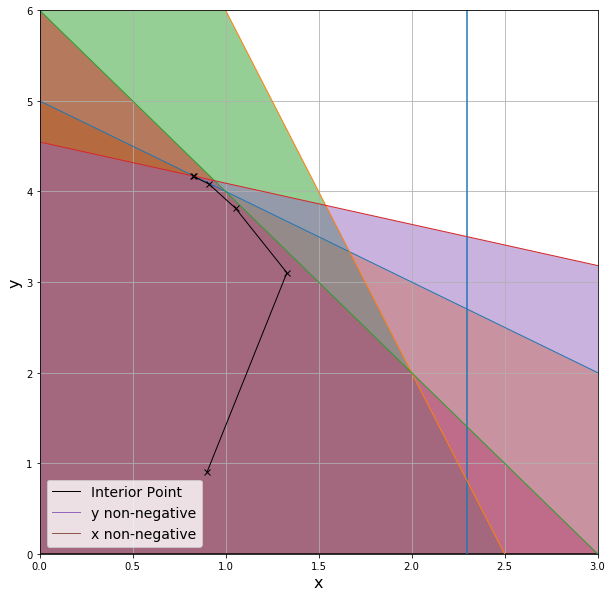

In [4]:
x = np.linspace(0, 50)
eqs = []
eqs.append((x, 5-x))
eqs.append((x, 10 - 4*x))
eqs.append((x, 6 - 2*x))
eqs.append((x, (10 - x)/2.2))

y_parallel = [2.3]
graph_2d(eqs, x, x_ipm_iter, y_parallel=y_parallel, xlim=3, ylim=6)

## Example 2

$
\begin{align}
    \max \quad & 2x_{1} + 2x_{2} \\
    \textrm{s.t.} \quad & x_{1} + x_{2} + s_{1} &= 3 \\
    \quad & x_{1}, x_{2} & \geq 0
\end{align}
$

In [5]:
A = np.asarray(np.matrix('1 1 1'), dtype=np.float64)
b = np.asarray([3], dtype=np.float64)
c = np.asarray([-2, -2, 0], dtype=np.float64)

epsilon = 1e-3
ipm = InteriorPointMethod(A, b, c)
x_ipm, x_ipm_iter = ipm.solve(theta=0.95, gamma=0.01, epsilon=epsilon)
print(ipm.print_metric())

Iteration -> 0
-----------------------------------------------------
Delta Y -> [-1.24143333]
-----------------------------------------------------
Delta S -> [-1.65856667 -1.65856667  0.34143333]
-----------------------------------------------------
Delta X -> [ 0.76666667  0.76666667 -1.23333333]
-----------------------------------------------------
Ax - b = [-0.09202703] 
-----------------------------------------------------
Norm of Ax - b -> 0.0920270270270267 
-----------------------------------------------------
Coordinates -> [1.43148649 1.43148649 0.045     ]
-----------------------------------------------------
Functional value -> -5.725945945945947
Iteration -> 1
-----------------------------------------------------
Delta Y -> [-1.3896524]
-----------------------------------------------------
Delta S -> [-0.04738035 -0.04738035  0.92160894]
-----------------------------------------------------
Delta X -> [ 0.08753778  0.08753778 -0.08304854]
----------------------------------

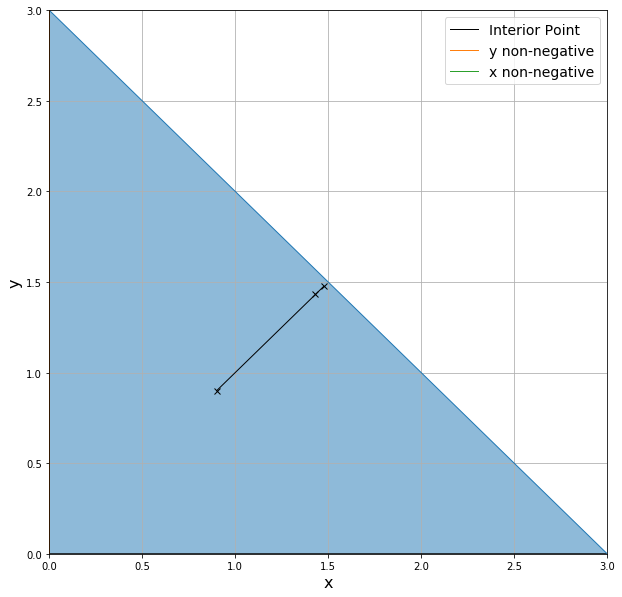

In [6]:
x = np.linspace(0, 50)
eqs = []

eqs.append((x, 3 - x))
graph_2d(eqs, x, x_ipm_iter, xlim=3, ylim=3)

## Example 3

$
\begin{align}
    \max \quad & 3x_{1} + 5x_{2} \\
    \textrm{s.t.} \quad & x_{1} + s_{1} &= 4 \\
    \quad & 2x_{2} + s_{2} &= 12 \\
    \quad & 3x_{1} + 2x_{2} + s_{3} &= 18 \\
    \quad & x_{1}, x_{2} & \geq 0
\end{align}
$

In [7]:
A = np.asarray(np.matrix('1 0 1 0 0; 0 2 0 1 0; 3 2 0 0 1'), dtype=np.float64)
b = np.asarray([4, 12, 18], dtype=np.float64)
c = np.asarray([-3, -5, 0, 0, 0], dtype=np.float64)

epsilon = 1e-3
ipm = InteriorPointMethod(A, b, c)
x_ipm, x_ipm_iter = ipm.solve(theta=0.95, gamma=0.01, epsilon=epsilon)
print(ipm.print_metric())

Iteration -> 0
-----------------------------------------------------
Delta Y -> [ 0.69781905  0.44496349 -0.73727937]
-----------------------------------------------------
Delta S -> [-2.38598095 -5.31536825 -1.59781905 -1.34496349 -0.16272063]
-----------------------------------------------------
Delta X -> [ 1.49408095  4.42346825  0.70591905  0.45306349 -0.72917937]
-----------------------------------------------------
Ax - b = [-0.11  -0.465 -0.63 ] 
-----------------------------------------------------
Norm of Ax - b -> 0.7907117047318867 
-----------------------------------------------------
Coordinates -> [2.3193769  5.10229484 1.5706231  1.33041032 0.2072796 ]
-----------------------------------------------------
Functional value -> -32.469604920634914
Iteration -> 1
-----------------------------------------------------
Delta Y -> [ 0.22674451 -1.39688577 -1.05236043]
-----------------------------------------------------
Delta S -> [-0.35450815 -0.05716908 -0.97636325  0.645233

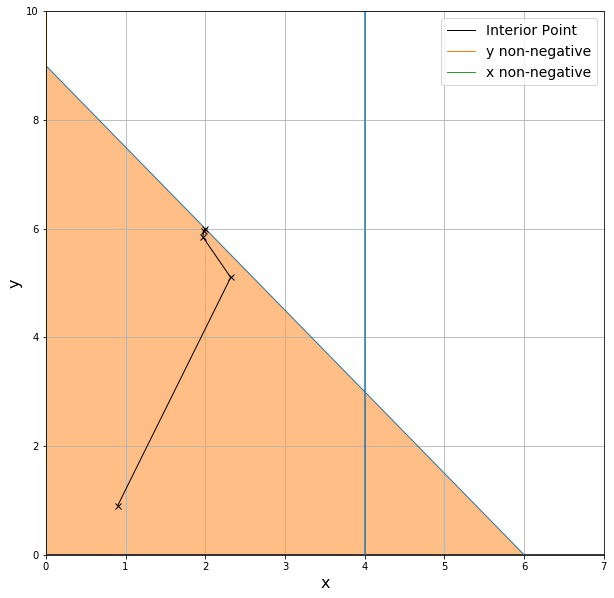

In [8]:
x = np.linspace(0, 50)
eqs = []
eqs.append((x, (18 - 3*x) / 2))

y_parallel = [4]
x_parallel = [6]
graph_2d(eqs, x, x_ipm_iter, y_parallel=y_parallel, xlim=7, ylim=10)